# Singular value decomposition for ill-conditioned problems

### Team 19. 彭盛皓, 游人樺

Consider the integral problem: 
$$\int_{a}^{b}K(s,t)f(t)dt=g(s)$$ for all $s\in(a,b)$       (4a)\
where $K(s,t)$ is a given function of two variables (called the kernel) and $g(s)$ is a given function. From this equation we try to find the function $f(t)$ for $a\leq t\leq b$.
This is called a “Fredholm integral equation of the first kind”.\
One way to approximate the solution to this problem is to discretize $t$ and $s$. For example, let $(a,b)=(0,1)$ and take $s_i=t_i$ for $i=1,2,…,n$. Compute approximations $f_i\approx f(t_i)$ by solving the discrete system obtained by replacing the integral by a finite sum. For example, using the “rectangle rule” we would replace the (4a) by:
$$\frac{1}{n}\sum_{j=1}^{n}K(s_i,t_j)f_j=g(s_i)$$ for $i=1,2,...,n$.    (4b)\
This is an $n\times n$ system of linear equations $Kf=g$ where $K_{ij}=\frac{1}{n}K(s_i,t_j)$ and $g_i=g(s_i)$ are known.

#### (a) As a first example, take $K(s,t)=s^2+t^2$ on $(0,1)$ and construct a function $g$ so that (4a) has a solution $f(t)=1+t$. We can do this by computing $$g(s)=\int_{0}^{1}(s^2+t^2)(1+t)dt=\frac{3}{2}s^2+\frac{7}{12}.$$ Use $n=10$ and set up the linear system $Kf=g$. What happens if you try to solve this by setting $f=K\setminus g$

Import the neccessary libraries

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

Construct $K$ and $g$.

In [2]:
def g(x):
    return 3 * x**2 / 2 + 7 / 12

def K(x, y):
    return x**2 + y**2

Construct the condition of the question.

In [3]:
n = 10
si = np.linspace(0, 1, n)
ti = si
Kij = np.zeros((n, n))
gi = np.zeros(n)
for i in range(n):
    for j in range(n):
        Kij[(i, j)] = K(si[i], ti[j]) / n
print('Kij =',Kij)
for i in range(n):
    gi[i] = g(si[i])
print('gi =',gi)

Kij = [[0.         0.00123457 0.00493827 0.01111111 0.01975309 0.0308642
  0.04444444 0.06049383 0.07901235 0.1       ]
 [0.00123457 0.00246914 0.00617284 0.01234568 0.02098765 0.03209877
  0.04567901 0.0617284  0.08024691 0.10123457]
 [0.00493827 0.00617284 0.00987654 0.01604938 0.02469136 0.03580247
  0.04938272 0.0654321  0.08395062 0.10493827]
 [0.01111111 0.01234568 0.01604938 0.02222222 0.0308642  0.04197531
  0.05555556 0.07160494 0.09012346 0.11111111]
 [0.01975309 0.02098765 0.02469136 0.0308642  0.03950617 0.05061728
  0.06419753 0.08024691 0.09876543 0.11975309]
 [0.0308642  0.03209877 0.03580247 0.04197531 0.05061728 0.0617284
  0.07530864 0.09135802 0.10987654 0.1308642 ]
 [0.04444444 0.04567901 0.04938272 0.05555556 0.06419753 0.07530864
  0.08888889 0.10493827 0.12345679 0.14444444]
 [0.06049383 0.0617284  0.0654321  0.07160494 0.08024691 0.09135802
  0.10493827 0.12098765 0.13950617 0.16049383]
 [0.07901235 0.08024691 0.08395062 0.09012346 0.09876543 0.10987654
  0.1234

Solve f.

In [4]:
fi = LA.inv(Kij) @ gi
print(fi)

[ 5568. -5376.  3712. -2816.  -256.   320.    88.   128.  -256.     0.]


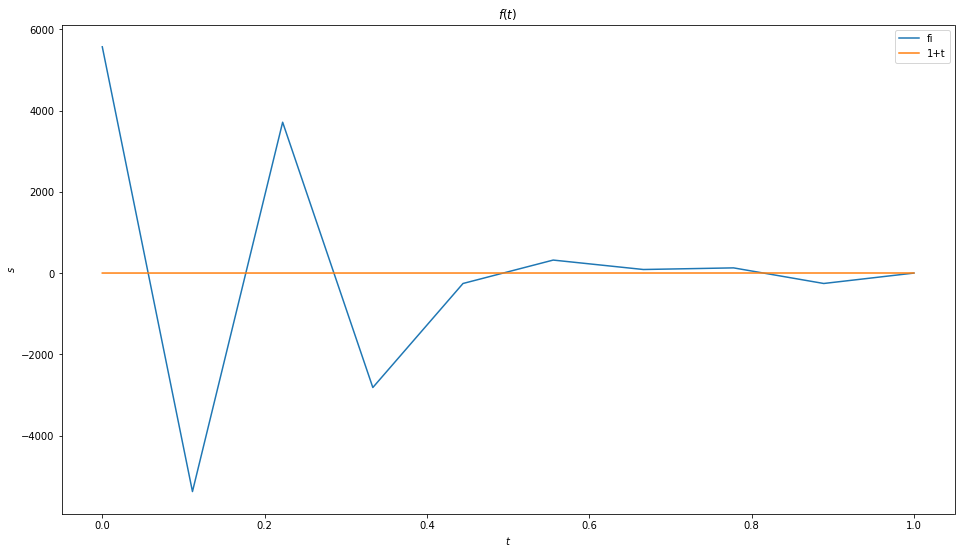

In [5]:
plt.figure(figsize=(16, 9))
plt.plot(si, fi)
plt.plot(ti, 1 + ti)
plt.ylabel(r'$s$')
plt.xlabel(r'$t$')
plt.title(r'$f(t)$')
plt.legend(["fi",'1+t'])
plt.show()

Here is the ill-condition that the value of $f$ becomes way to large, which is hard to calculate.

#### (b) Compute the SVD (singular value decomposition) of K. What is the rank of K?

We can easily use the numpy library to compute SVD.

In [6]:
U, sigma, VT = LA.svd(Kij)
D = np.zeros((n, n))
for i in range(n):
    D[i, i] = sigma[i]
print('U =',U)
print('D =',D)
print('V^T =',VT)
print('sigma =',sigma)

U = [[-0.17011171 -0.42861431  0.84309928 -0.12293344  0.09025685  0.11258072
   0.17645045 -0.04020073 -0.08369907  0.0290799 ]
 [-0.17445602 -0.41766837 -0.28467192 -0.08444515  0.40285547  0.34800954
  -0.30884292  0.054387   -0.20908904 -0.53055241]
 [-0.18748895 -0.38483055 -0.08129636  0.24936461  0.20715548 -0.36504301
  -0.29311498  0.51095981  0.18699041  0.43569486]
 [-0.20921049 -0.33010084 -0.27644013 -0.1472823  -0.25966026 -0.30433893
   0.12433239 -0.31803116 -0.63997568  0.25087114]
 [-0.23962065 -0.25347926 -0.10472776 -0.28712602 -0.12480392 -0.396865
   0.03640212 -0.35843257  0.63413491 -0.28269597]
 [-0.27871942 -0.15496579 -0.24795724  0.15397738 -0.187962    0.25343466
   0.73862227  0.3823538   0.11631024 -0.09091243]
 [-0.32650681 -0.03456044  0.08292306  0.19445986 -0.71668394  0.33388638
  -0.46593801  0.02564616  0.06564802 -0.0180668 ]
 [-0.38298282  0.10773679 -0.14590186 -0.05619127  0.33129316  0.45189899
   0.01181455 -0.40190514  0.21183158  0.5447608 

The rank of a matrix is equal to the number of non-zero singular values, so the rank of $K_{ij}$ is 2.

#### (c) We can use the SVD to compute the minimum norm least square solution for any right hand side $g$ to obtain $\hat{f}$, say. Do this for $g_i=\frac{3}{2}s_i^2+\frac{7}{12}$ and compare the solution $\hat{f}$ to our original $f(t)=1+t$.

Consider the minimum norm least square $min||Kf-g||_2^2$, let $K=K_{ij}$.\
Let $K=UDV^T$ be the SVD of $K\in R^{n\times n}, n=10$. \
Using the orthogonality of $U$ and $V$, we have 
$$||Kf-g||_2^2=||U^T(KVV^Tf-g)||_2^2=||DV^Tf-U^Tg||_2^2=\sum_{i=1}^{2}(\sigma_ih_i-u_i^Tg)^2+\sum_3^{10}(u_i^Tg)^2$$, where $h=V^Tf$\
Thus, $min||Kf-g||_2^2=\sum_{i=1}^{2}(\sigma_ih_i-u_i^Tg)^2+\sum_3^{10}(u_i^Tg)^2$\
The solution $h=[h_i]$, where $h_i=\frac{u_i^Tg}{\sigma_i}$ for $i=1,2$ and $h_i=arbitrary$ for $i=3,...,10$, since the rank of $K$ is $2$.\
So, the minimum solution of the linear least square problem is given by $h_i=\frac{u_i^Tg}{\sigma_i}$ for $i=1,2$ and $h_i=0$ for $i=3,...,10$.\
And, $\hat{f}=Vh$. Therefore, the minimum norm solution is $\hat{f}_i=v_ih$

Next, construct $\hat{f}=[\hat{f}_i]$ in Python.

In [7]:
h = np.zeros(n)
f_hat = np.zeros(n)
r = 2
for i in range(r):
    h[i] = np.dot(U[i], gi) / sigma[i]
for i in range(n):
    f_hat[i] = np.dot(VT.T[i], h)
print(f_hat)

[-5.50104712 -5.36446485 -4.95471805 -4.27180673 -3.31573087 -2.08649047
 -0.58408555  1.1914839   3.24021789  5.56211641]


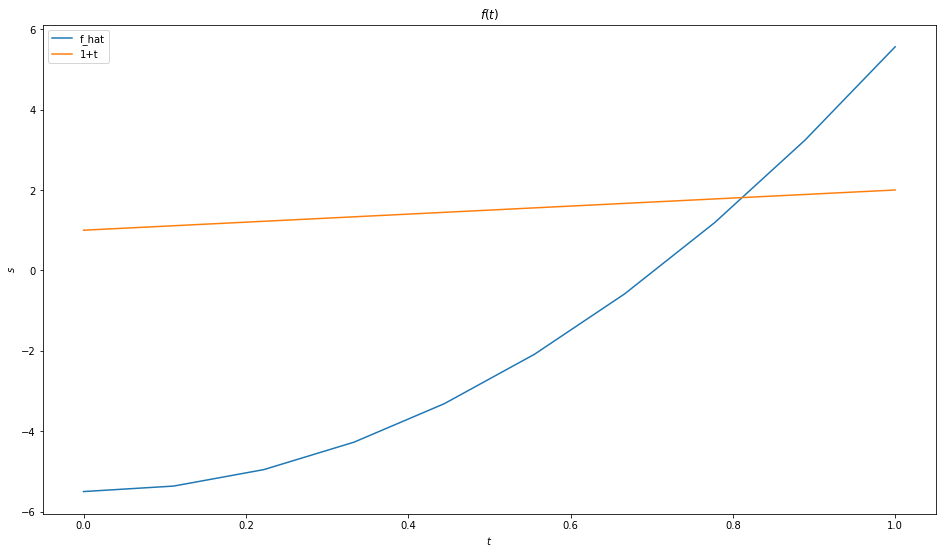

In [8]:
plt.figure(figsize=(16, 9))
plt.plot(si, f_hat)
plt.plot(ti, 1 + ti)
plt.ylabel(r'$s$')
plt.xlabel(r'$t$')
plt.title(r'$f(t)$')
plt.legend(["f_hat",'1+t'])
plt.show()

There is still difference between our approximation and actual answer. 

#### (d) An alternative way to find solution of (4a) is to solve the following regularized problem by including a penalty term: $$f_\alpha =argmin_{f \in R^n}||Kf-g||_2^2+\alpha \Phi(f),$$(4c) where $\alpha\in R_+$ is a parameter, and $\Phi(f)$ is a function that may be chosen as $\Phi(f)=||f||_2^2$ or $\Phi(f)=TV(f)=\sum_{i=1}^{n-1}|f_{i+1}-f_i|$. With a chosen $\alpha$ and $\Phi$, find solution of (4c).

If choosing $\Phi(f)=||f||_2^2$, $f_\alpha =argmin_{f \in R^n}||Kf-g||_2^2+\alpha ||f||_2^2,$\
As (c) derived, $||Kf-g||_2^2=||U^T(KVV^Tf-g)||_2^2=||DV^Tf-U^Tg||_2^2=\sum_{i=1}^{2}(\sigma_ih_i-u_i^Tg)^2+\sum_3^{10}(u_i^Tg)^2$, where $h=V^Tf$\
Then, $||Kf-g||_2^2+\alpha ||f||_2^2=\sum_{i=1}^{2}(\sigma_ih_i-u_i^Tg)^2+\sum_{i=3}^{10}(u_i^Tg)^2+\alpha \sum_{i=1}^{10}(v_ih)^2$\
Only need to consider $i=1,2$, we can let $h_i=0$ for $i=3,4,...,10$

We can use gradient descent method to solve this question.

In [37]:
def ftheta(alpha):
    learning_rate = 0.01
    n_iterations = 5000
    gbar = gi[:,np.newaxis]

    #ftheta = np.random.randn(n,1)
    ftheta = np.ones((n,1))

    for iteration in range(n_iterations):
        #求出預測的yhat值
        #scores = np.dot(Kij,ftheta)
        scores = Kij.T @ ftheta
        #誤差值
        error = scores - gbar
        #x的shape(50,2) output_error的shapeｊ為(50,1) gradients為(2,1)
        gradients = 2 * (Kij.T @ error + alpha * (np.identity(n) @ ftheta))
        #每次對theta
        ftheta -= learning_rate * gradients
        #plt.plot(theta[0],theta[1],'o-',color='red')
    return ftheta

<function matplotlib.pyplot.show(*args, **kw)>

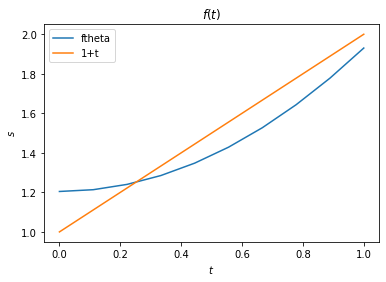

In [40]:
plt.plot(si, ftheta(0.005))
plt.plot(ti, 1 + ti)
plt.ylabel(r'$s$')
plt.xlabel(r'$t$')
plt.title(r'$f(t)$')
plt.legend(["ftheta",'1+t'])
plt.show

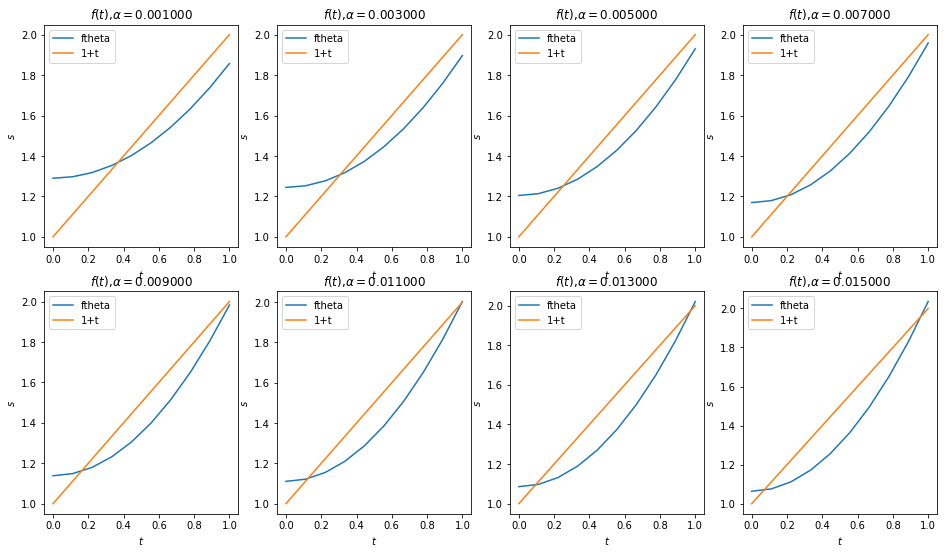

In [52]:
fig, axes = plt.subplots(2, 4, figsize=(16,9))

for idx, ax in enumerate(axes.flatten()):
    a = 0.001 + idx * 0.002
    ax.plot(si, ftheta(0.001 + idx * 0.002))
    ax.plot(ti, 1 + ti)
    ax.set_ylabel(r'$s$')
    ax.set_xlabel(r'$t$')
    ax.set_title(r'$f(t)$,$\alpha =$%f' %a)
    ax.legend(["ftheta",'1+t'])
plt.show()

## Reference
1. Singular Value Decomposition (SVD) (Trucco, Appendix A.6)\
https://www.cse.unr.edu/~bebis/CS791E/Notes/SVD.pdf
2. Class Material
3. machine learning 下的 Linear Regression 實作(使用python)
https://medium.com/@jacky308082/machine-learning-%E4%B8%8B%E7%9A%84-linear-regression-%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-7e1dd03a4d46